# 1- Data:

## Load Dataset

In [ ]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=19gR5EfwNwzKxT0YIrhzhhIayt9sZ-CTP"

Downloading...
From (original): https://drive.google.com/uc?id=19gR5EfwNwzKxT0YIrhzhhIayt9sZ-CTP
From (redirected): https://drive.google.com/uc?id=19gR5EfwNwzKxT0YIrhzhhIayt9sZ-CTP&confirm=t&uuid=5ea2d3a2-a8c1-48c8-800d-2d72c2406626
To: /content/dataset.csv
100% 507M/507M [00:04<00:00, 102MB/s]


In [ ]:
import pandas as pd

# Assuming the file is a CSV
data = pd.read_csv('dataset.csv')
print(data.head())


   Unnamed: 0  user_id  service_id     rt user_IP_Address   user_country  \
0           0        0           0  5.982  12.108.127.138  United States   
1           1        0           1  0.228  12.108.127.138  United States   
2           2        0           2  0.237  12.108.127.138  United States   
3           3        0           3  0.221  12.108.127.138  United States   
4           4        0           4  0.222  12.108.127.138  United States   

   user_IP_Number                     user_AS  user_Latitude  user_Longitude  \
0     208437130.0  AS7018 AT&T Services, Inc.           38.0           -97.0   
1     208437130.0  AS7018 AT&T Services, Inc.           38.0           -97.0   
2     208437130.0  AS7018 AT&T Services, Inc.           38.0           -97.0   
3     208437130.0  AS7018 AT&T Services, Inc.           38.0           -97.0   
4     208437130.0  AS7018 AT&T Services, Inc.           38.0           -97.0   

   ...                                       WSDL_Address  ser

In [ ]:
dataset_rt = data [['user_id' , 'user_country_id' , 'user_AS_id' ,'user_Latitude' , 'user_Longitude' , 'rt', 'service_id' , 'service_country_id' ,'service_AS_id' , 'service_Latitude' , 'service_Longitude' ]]
print(dataset_rt.head())

   user_id  user_country_id  user_AS_id  user_Latitude  user_Longitude     rt  \
0        0                0           0           38.0           -97.0  5.982   
1        0                0           0           38.0           -97.0  0.228   
2        0                0           0           38.0           -97.0  0.237   
3        0                0           0           38.0           -97.0  0.221   
4        0                0           0           38.0           -97.0  0.222   

   service_id  service_country_id  service_AS_id  service_Latitude  \
0           0                   0              0              38.0   
1           1                   0              0              38.0   
2           2                   0              0              38.0   
3           3                   0              0              38.0   
4           4                   0              1              38.0   

   service_Longitude  
0              -97.0  
1              -97.0  
2              -97.0  


## Calculate Distance & Split Data

In [ ]:
from geopy.distance import geodesic

dataset_rt['distance'] = dataset_rt.apply(lambda row: geodesic((row['user_Latitude'], row['user_Longitude']), (row['service_Latitude'], row['service_Longitude'])).kilometers, axis=1)

<ipython-input-4-0e8958493ac8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_rt['distance'] = dataset_rt.apply(lambda row: geodesic((row['user_Latitude'], row['user_Longitude']), (row['service_Latitude'], row['service_Longitude'])).kilometers, axis=1)


In [ ]:
dataset_rt

,user_id,user_country_id,user_AS_id,user_Latitude,user_Longitude,rt,service_id,service_country_id,service_AS_id,service_Latitude,service_Longitude,distance
0,0,0,0,38.0000,-97.0000,5.982,0,0,0,38.0000,-97.0000,0.000000
1,0,0,0,38.0000,-97.0000,0.228,1,0,0,38.0000,-97.0000,0.000000
2,0,0,0,38.0000,-97.0000,0.237,2,0,0,38.0000,-97.0000,0.000000
3,0,0,0,38.0000,-97.0000,0.221,3,0,0,38.0000,-97.0000,0.000000
4,0,0,0,38.0000,-97.0000,0.222,4,0,1,38.0000,-97.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1873831,338,0,136,40.1095,-88.2123,0.250,5820,0,809,38.1103,-78.9073,834.395742
1873832,338,0,136,40.1095,-88.2123,0.160,5821,0,809,38.1103,-78.9073,834.395742
1873833,338,0,136,40.1095,-88.2123,0.184,5822,0,62,29.4889,-98.3987,1500.097603
1873834,338,0,136,40.1095,-88.2123,0.136,5823,0,809,38.1103,-78.9073,834.395742


In [ ]:
### rt_dataset:
from sklearn.model_selection import train_test_split

train_rt_01, test_rt_01 = train_test_split(dataset_rt, test_size=0.99)
train_rt_02, test_rt_02 = train_test_split(dataset_rt, test_size=0.98)
train_rt_03, test_rt_03 = train_test_split(dataset_rt, test_size=0.97)
train_rt_04, test_rt_04 = train_test_split(dataset_rt, test_size=0.96)
train_rt_05, test_rt_05 = train_test_split(dataset_rt, test_size=0.95)


##  Distance Normalization on train data and test data

In [ ]:
from sklearn.preprocessing import StandardScaler

### distance normalization

train_rt_01['distance_scale'] = (train_rt_01['distance'] - train_rt_01['distance'].mean()) / train_rt_01['distance'].std()
train_rt_02['distance_scale'] = (train_rt_02['distance'] - train_rt_02['distance'].mean()) / train_rt_02['distance'].std()
train_rt_03['distance_scale'] = (train_rt_03['distance'] - train_rt_03['distance'].mean()) / train_rt_03['distance'].std()
train_rt_04['distance_scale'] = (train_rt_04['distance'] - train_rt_04['distance'].mean()) / train_rt_04['distance'].std()
train_rt_05['distance_scale'] = (train_rt_05['distance'] - train_rt_05['distance'].mean()) / train_rt_05['distance'].std()


test_rt_01['distance_scale'] = (test_rt_01['distance'] - test_rt_01['distance'].mean()) / test_rt_01['distance'].std()
test_rt_02['distance_scale'] = (test_rt_02['distance'] - test_rt_02['distance'].mean()) / test_rt_02['distance'].std()
test_rt_03['distance_scale'] = (test_rt_03['distance'] - test_rt_03['distance'].mean()) / test_rt_03['distance'].std()
test_rt_04['distance_scale'] = (test_rt_04['distance'] - test_rt_04['distance'].mean()) / test_rt_04['distance'].std()
test_rt_05['distance_scale'] = (test_rt_05['distance'] - test_rt_05['distance'].mean()) / test_rt_05['distance'].std()



# 2- Import Librarys:

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, Concatenate, Dot, Lambda , LSTM
from keras.optimizers import Adam
from keras import backend as K
from sklearn.metrics import precision_score, recall_score, ndcg_score, mean_absolute_error, mean_squared_error, r2_score

import multiprocessing
import os
import sys
import tensorflow as tf
from tensorflow import keras
from time import time
import argparse
from keras import initializers
from keras.regularizers import l2
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Attention, Embedding, Input, Dense, Flatten, concatenate, dot, Lambda
from keras.optimizers import Adam, Adamax
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# 3- Hyper parameters:

In [ ]:
layers=[512, 256, 128, 64, 1]
reg_layers=[0, 0, 0, 0, 0]
embedding_size= 10
latent_dim = 5
batch_sizes = 32
latent_dim = 5
lr = 0.0001

In [ ]:
rmse= keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
mae = keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None)
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=7)

# 4- Define Functions

In [ ]:
# Define self-attention layer

class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim):
        super(SelfAttention, self).__init__()
        self.embedding_dim = embedding_dim
        self.query = tf.keras.layers.Dense(embedding_dim)
        self.key = tf.keras.layers.Dense(embedding_dim)
        self.value = tf.keras.layers.Dense(embedding_dim)
        self.softmax = tf.keras.layers.Softmax()

    def call(self, inputs):
        query = self.query(inputs)
        key = self.key(inputs)
        value = self.value(inputs)

        # Calculate attention scores
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores_scaled = attention_scores / tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))

        # Calculate attention weights
        attention_weights = self.softmax(attention_scores_scaled)

        # calculate output using attention weights
        output = tf.matmul(attention_weights, value)
        return output

# 4- Define model

In [36]:
def proposed_model(num_users_id,num_users_country,num_users_AS,num_services_id,num_services_country,num_services_AS):

  # Input Layer

  user_id_input = Input(shape=(1,), dtype='int64', name='user_id_input')
  user_country_input = Input(shape=(1,), dtype='int64', name='user_country_input')
  user_AS_input = Input(shape=(1,), dtype='int64', name='user_AS_input')
  user_latitude_input = Input(shape=(1,), dtype='float32', name='user_latitude_input')
  user_longitude_input = Input(shape=(1,), dtype='float32', name='user_longitude_input')


  item_id_input = Input(shape=(1,), dtype='int64', name='item_id_input')
  item_country_input = Input(shape=(1,), dtype='int64', name='item_country_input')
  item_AS_input = Input(shape=(1,), dtype='int64', name='item_AS_input')
  item_latitude_input = Input(shape=(1,), dtype='float32', name='item_latitude_input')
  item_longitude_input = Input(shape=(1,), dtype='float32', name='item_longitude_input')


  distance_input = Input(shape=(1,), dtype='float32', name='distance_user_service')


  # Embedding Layer

  user_id_embedding = Embedding(num_users_id+500, 16)(user_id_input)
  user_country_embedding = Embedding(num_users_country+500, 16)(user_country_input)
  user_AS_embedding = Embedding(num_users_AS+500, 16)(user_AS_input)

  item_id_embedding = Embedding(num_services_id+500, 16)(item_id_input)
  item_country_embedding = Embedding(num_services_country+500, 16)(item_country_input)
  item_AS_embedding = Embedding(num_services_AS+500, 16)(item_AS_input)

  # Flatten Layer

  user_id_latent = Flatten()(user_id_embedding)
  user_country_latent = Flatten()(user_country_embedding)
  user_AS_latent = Flatten()(user_AS_embedding)

  item_id_latent = Flatten()(item_id_embedding)
  item_country_latent = Flatten()(item_country_embedding)
  item_AS_latent = Flatten()(item_AS_embedding)

  user_lc_latent = concatenate([user_country_latent, user_AS_latent])
  item_lc_latent = concatenate([item_country_latent, item_AS_latent])



  #concatenate
  predict_user_vector = concatenate([user_id_latent, user_country_latent , user_AS_latent , user_latitude_input , user_longitude_input])
  predict_item_vector = concatenate([item_id_latent, item_country_latent , item_AS_latent , item_latitude_input , item_longitude_input])

  all_feature = concatenate([user_id_latent,user_country_latent , user_AS_latent, user_latitude_input, user_longitude_input,item_id_latent, item_country_latent , item_AS_latent ,item_latitude_input,item_longitude_input])

  attention_layer = SelfAttention(embedding_size)
  location_self_attention = attention_layer(all_feature)

  mlp_vector = concatenate([predict_user_vector, predict_item_vector])



  # Middle Layer
  for index in range(1, len(layers) - 1):
    layer = Dense(units=layers[index], kernel_initializer=initializers.random_normal(),
                  kernel_regularizer=l2(reg_layers[index]), activation='relu', name='mlpLayer%d' % index)




    mlp_vector = layer(mlp_vector)

  predict_vector = concatenate([mlp_vector, distance_input,location_self_attention])

  # Output layer
  prediction = Dense(units=layers[-1], activation='linear', kernel_initializer=initializers.lecun_normal(),
                     kernel_regularizer=l2(reg_layers[-1]), name='prediction')(predict_vector)


  proposed_model = Model(inputs=[user_id_input, user_country_input, user_AS_input, user_latitude_input , user_longitude_input , item_id_input, item_country_input , item_AS_input,item_latitude_input, item_longitude_input, distance_input], outputs=prediction)
  return proposed_model

# 5- Train and Test Model

## RT = 1%

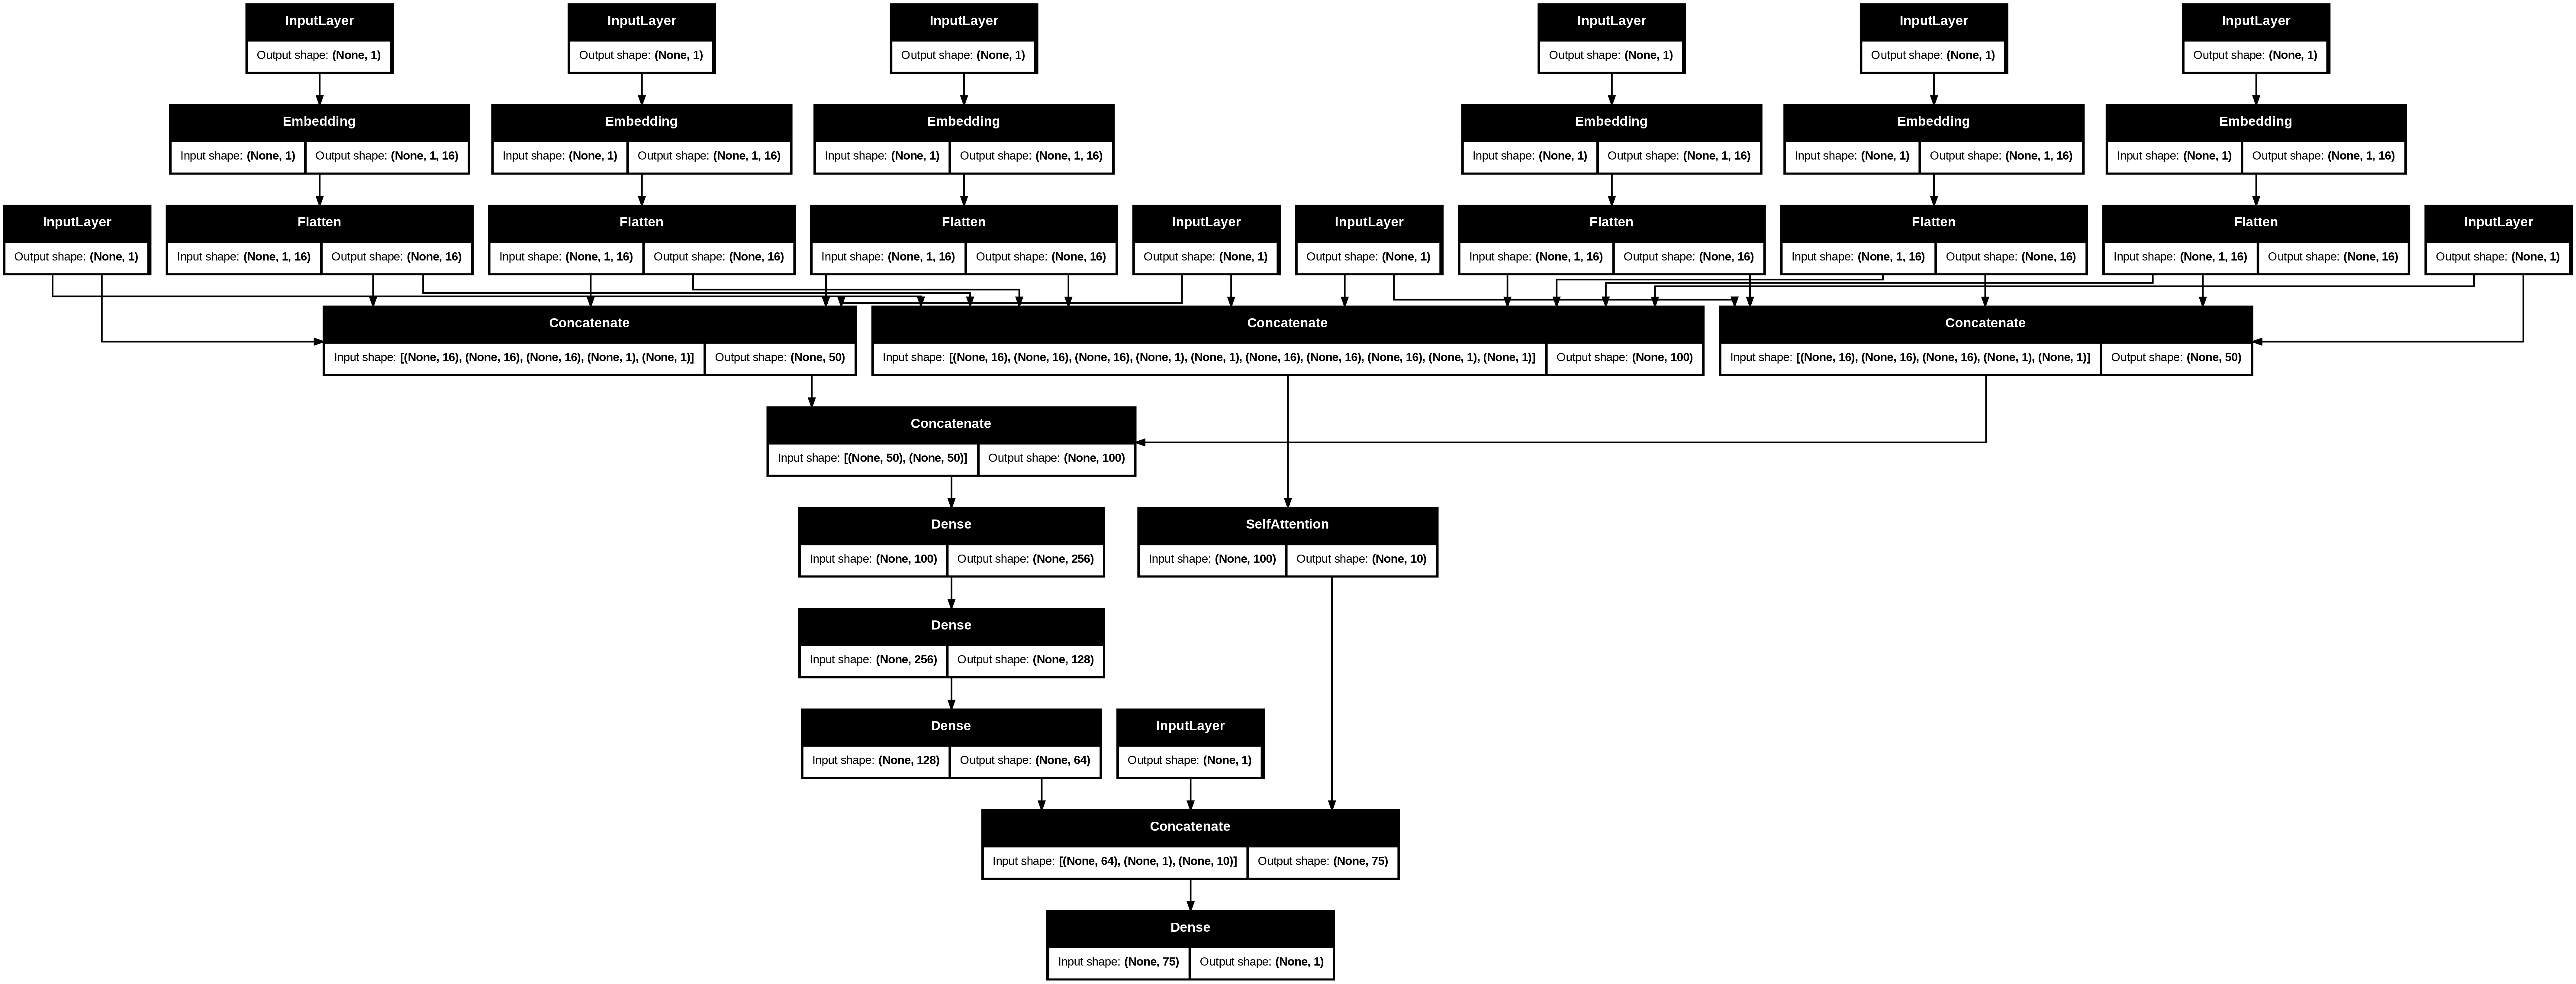

In [ ]:
num_users_id_rt_01 = len(train_rt_01.user_id.unique())
num_users_country_rt_01 = len(train_rt_01.user_country_id.unique())
num_users_AS_rt_01 = len(train_rt_01.user_AS_id.unique())

num_services_id_rt_01 = len(train_rt_01.service_id.unique())
num_services_country_rt_01 = len(train_rt_01.service_country_id.unique())
num_services_AS_rt_01 = len(train_rt_01.service_AS_id.unique())



model_rt_01 = proposed_model(num_users_id_rt_01,num_users_country_rt_01,num_users_AS_rt_01,num_services_id_rt_01,num_services_country_rt_01,num_services_AS_rt_01)
keras.utils.plot_model(model_rt_01, show_shapes=True)

In [ ]:
model_rt_01.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics = [rmse,mae])
history_rt_01 = model_rt_01.fit([train_rt_01.user_id,train_rt_01.user_country_id,train_rt_01.user_AS_id,train_rt_01.user_Latitude,train_rt_01.user_Longitude,train_rt_01.service_id,train_rt_01.service_country_id,train_rt_01.service_AS_id ,train_rt_01.service_Latitude, train_rt_01.service_Longitude,train_rt_01.distance_scale], train_rt_01.rt, epochs=60 , batch_size = 64 , verbose=1, shuffle=True, callbacks=[TensorBoard(log_dir='./Log')])

Epoch 1/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3.3962 - mean_absolute_error: 3.3962 - root_mean_squared_error: 4.6555
Epoch 2/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2938 - mean_absolute_error: 1.2938 - root_mean_squared_error: 2.3419
Epoch 3/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.9458 - mean_absolute_error: 0.9458 - root_mean_squared_error: 2.0657
Epoch 4/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.8326 - mean_absolute_error: 0.8326 - root_mean_squared_error: 1.9913
Epoch 5/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8001 - mean_absolute_error: 0.8001 - root_mean_squared_error: 2.0258
Epoch 6/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7531 - mean_absolute_error: 0.7531 - root_mean_squared_error: 2.0015
Epoch 7/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7170 - mean_absolute_error: 0.7170 - root_mean_squared_error: 1.9985
Epoch 8/60
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6916 - mean_absolut

In [ ]:
loss_model_rt_01,rmse_model_rt_01,mae_model_rt_01 = model_rt_01.evaluate([test_rt_01.user_id,test_rt_01.user_country_id,test_rt_01.user_AS_id,test_rt_01.user_Latitude,test_rt_01.user_Longitude,test_rt_01.service_id,test_rt_01.service_country_id,test_rt_01.service_AS_id,test_rt_01.service_Latitude,test_rt_01.service_Longitude,test_rt_01.distance_scale],test_rt_01["rt"])
print('loss model is:',loss_model_rt_01)
print('rmse model is:',rmse_model_rt_01)
print('mae model is:', mae_model_rt_01)

57972/57972 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - loss: 0.5173 - mean_absolute_error: 0.5173 - root_mean_squared_error: 1.5028
loss model is: 0.5173394680023193
rmse model is: 1.5046480894088745
mae model is: 0.5173394680023193


## RT = 2%

In [29]:
num_users_id_rt_02 = len(train_rt_02.user_id.unique())
num_users_country_rt_02 = len(train_rt_02.user_country_id.unique())
num_users_AS_rt_02 = len(train_rt_02.user_AS_id.unique())

num_services_id_rt_02 = len(train_rt_02.service_id.unique())
num_services_country_rt_02 = len(train_rt_02.service_country_id.unique())
num_services_AS_rt_02 = len(train_rt_02.service_AS_id.unique())



model_rt_02 = proposed_model(num_users_id_rt_02,num_users_country_rt_02,num_users_AS_rt_02,num_services_id_rt_02,num_services_country_rt_02,num_services_AS_rt_02)

In [30]:
model_rt_02.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics = [rmse,mae])
history_rt_02 = model_rt_02.fit([train_rt_02.user_id,train_rt_02.user_country_id,train_rt_02.user_AS_id,train_rt_02.user_Latitude,train_rt_02.user_Longitude,train_rt_02.service_id,train_rt_02.service_country_id,train_rt_02.service_AS_id ,train_rt_02.service_Latitude, train_rt_02.service_Longitude,train_rt_02.distance_scale], train_rt_02.rt, epochs=60 , batch_size = 64 , verbose=1, shuffle=True, callbacks=[TensorBoard(log_dir='./Log')])

Epoch 1/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 1.2353 - mean_absolute_error: 0.3753 - root_mean_squared_error: 1.3073
Epoch 2/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.7243 - mean_absolute_error: 0.7243 - root_mean_squared_error: 1.9444
Epoch 3/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.7042 - mean_absolute_error: 0.7042 - root_mean_squared_error: 2.0069
Epoch 4/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.6883 - mean_absolute_error: 0.6883 - root_mean_squared_error: 1.9943
Epoch 5/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.6612 - mean_absolute_error: 0.6612 - root_mean_squared_error: 1.9461
Epoch 6/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.6394 - mean_absolute_error: 0.6394 - root_mean_squared_error: 1.9554
Epoch 7/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.6199 - mean_absolute_error: 0.6199 - root_mean_squared_error: 1.9479
Epoch 8/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.5891 - mean_abs

In [31]:
loss_model_rt_02,rmse_model_rt_02,mae_model_rt_02 = model_rt_02.evaluate([test_rt_02.user_id,test_rt_02.user_country_id,test_rt_02.user_AS_id,test_rt_02.user_Latitude,test_rt_02.user_Longitude,test_rt_02.service_id,test_rt_02.service_country_id,test_rt_02.service_AS_id,test_rt_02.service_Latitude,test_rt_02.service_Longitude,test_rt_02.distance_scale],test_rt_02["rt"])
print('loss model is:',loss_model_rt_02)
print('rmse model is:',rmse_model_rt_02)
print('mae model is:', mae_model_rt_02)

57387/57387 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - loss: 0.4522 - mean_absolute_error: 0.4522 - root_mean_squared_error: 1.4432
loss model is: 0.44962430000305176
rmse model is: 1.4353282451629639
mae model is: 0.44962430000305176


## RT = 3%

In [37]:
num_users_id_rt_03 = len(train_rt_03.user_id.unique())
num_users_country_rt_03 = len(train_rt_03.user_country_id.unique())
num_users_AS_rt_03 = len(train_rt_03.user_AS_id.unique())

num_services_id_rt_03 = len(train_rt_03.service_id.unique())
num_services_country_rt_03 = len(train_rt_03.service_country_id.unique())
num_services_AS_rt_03 = len(train_rt_03.service_AS_id.unique())



model_rt_03 = proposed_model( num_users_id_rt_03,num_users_country_rt_03,num_users_AS_rt_03,num_services_id_rt_03,num_services_country_rt_03,num_services_AS_rt_03)

In [38]:
model_rt_03.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics = [rmse,mae])
history_rt_03 = model_rt_03.fit([train_rt_03.user_id,train_rt_03.user_country_id,train_rt_03.user_AS_id,train_rt_03.user_Latitude,train_rt_03.user_Longitude,train_rt_03.service_id,train_rt_03.service_country_id,train_rt_03.service_AS_id ,train_rt_03.service_Latitude, train_rt_03.service_Longitude,train_rt_03.distance_scale], train_rt_03.rt, epochs=60 , batch_size = 64 , verbose=1, shuffle=True, callbacks=[TensorBoard(log_dir='./Log')])

Epoch 1/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 1.5185 - mean_absolute_error: 0.4377 - root_mean_squared_error: 1.3832
Epoch 2/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.7490 - mean_absolute_error: 0.7490 - root_mean_squared_error: 2.0016
Epoch 3/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.7019 - mean_absolute_error: 0.7019 - root_mean_squared_error: 1.9992
Epoch 4/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.6734 - mean_absolute_error: 0.6734 - root_mean_squared_error: 1.9741
Epoch 5/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.6366 - mean_absolute_error: 0.6366 - root_mean_squared_error: 1.9373
Epoch 6/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6110 - mean_absolute_error: 0.6110 - root_mean_squared_error: 1.9266
Epoch 7/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - root_mean_squared_error: 1.8775
Epoch 8/60
879/879 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.5849 - mean_ab

In [39]:
loss_model_rt_03,rmse_model_rt_03,mae_model_rt_03 = model_rt_03.evaluate([test_rt_03.user_id,test_rt_03.user_country_id,test_rt_03.user_AS_id,test_rt_03.user_Latitude,test_rt_03.user_Longitude,test_rt_03.service_id,test_rt_03.service_country_id,test_rt_03.service_AS_id,test_rt_03.service_Latitude,test_rt_03.service_Longitude,test_rt_03.distance_scale],test_rt_03["rt"])
print('loss model is:',loss_model_rt_03)
print('rmse model is:',rmse_model_rt_03)
print('mae model is:', mae_model_rt_03)

56801/56801 ━━━━━━━━━━━━━━━━━━━━ 120s 2ms/step - loss: 0.4052 - mean_absolute_error: 0.4052 - root_mean_squared_error: 1.3433
loss model is: 0.40646952390670776
rmse model is: 1.3511461019515991
mae model is: 0.40646952390670776


## RT =4%

In [40]:
num_users_id_rt_04 = len(train_rt_04.user_id.unique())
num_users_country_rt_04 = len(train_rt_04.user_country_id.unique())
num_users_AS_rt_04 = len(train_rt_04.user_AS_id.unique())

num_services_id_rt_04 = len(train_rt_04.service_id.unique())
num_services_country_rt_04 = len(train_rt_04.service_country_id.unique())
num_services_AS_rt_04 = len(train_rt_04.service_AS_id.unique())



model_rt_04 = proposed_model(num_users_id_rt_04,num_users_country_rt_04,num_users_AS_rt_04,num_services_id_rt_04,num_services_country_rt_04,num_services_AS_rt_04)

In [41]:
model_rt_04.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics = [rmse,mae])
history_rt_04 = model_rt_04.fit([train_rt_04.user_id,train_rt_04.user_country_id,train_rt_04.user_AS_id,train_rt_04.user_Latitude,train_rt_04.user_Longitude,train_rt_04.service_id,train_rt_04.service_country_id,train_rt_04.service_AS_id ,train_rt_04.service_Latitude, train_rt_04.service_Longitude,train_rt_04.distance_scale], train_rt_04.rt, epochs=60 , batch_size = 64 , verbose=1, shuffle=True, callbacks=[TensorBoard(log_dir='./Log')])

Epoch 1/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - loss: 1.4226 - mean_absolute_error: 0.4211 - root_mean_squared_error: 1.3770
Epoch 2/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.6906 - mean_absolute_error: 0.6906 - root_mean_squared_error: 1.9688
Epoch 3/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - root_mean_squared_error: 1.9776
Epoch 4/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.6435 - mean_absolute_error: 0.6435 - root_mean_squared_error: 1.9451
Epoch 5/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.6046 - mean_absolute_error: 0.6046 - root_mean_squared_error: 1.9102
Epoch 6/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.5742 - mean_absolute_error: 0.5742 - root_mean_squared_error: 1.8429
Epoch 7/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.5445 - mean_absolute_error: 0.5445 - root_mean_squared_error: 1.7452
Epoch 8/60
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - lo

In [42]:
loss_model_rt_04,rmse_model_rt_04,mae_model_rt_04 = model_rt_04.evaluate([test_rt_04.user_id,test_rt_04.user_country_id,test_rt_04.user_AS_id,test_rt_04.user_Latitude,test_rt_04.user_Longitude,test_rt_04.service_id,test_rt_04.service_country_id,test_rt_04.service_AS_id,test_rt_04.service_Latitude,test_rt_04.service_Longitude,test_rt_04.distance_scale],test_rt_04["rt"])
print('loss model is:',loss_model_rt_04)
print('rmse model is:',rmse_model_rt_04)
print('mae model is:', mae_model_rt_04)

56216/56216 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - root_mean_squared_error: 1.3239
loss model is: 0.3821233808994293
rmse model is: 1.3249186277389526
mae model is: 0.3821233808994293


## RT = 5%

In [ ]:
num_users_id_rt_05 = len(train_rt_05.user_id.unique())
num_users_country_rt_05 = len(train_rt_05.user_country_id.unique())
num_users_AS_rt_05 = len(train_rt_05.user_AS_id.unique())

num_services_id_rt_05 = len(train_rt_05.service_id.unique())
num_services_country_rt_05 = len(train_rt_05.service_country_id.unique())
num_services_AS_rt_05 = len(train_rt_05.service_AS_id.unique())



model_rt_05 = proposed_model(num_users_id_rt_05,num_users_country_rt_05,num_users_AS_rt_05,num_services_id_rt_05,num_services_country_rt_05,num_services_AS_rt_05)

In [ ]:
model_rt_05.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics = [rmse,mae])
history_rt_05 = model_rt_05.fit([train_rt_05.user_id,train_rt_05.user_country_id,train_rt_05.user_AS_id,train_rt_05.user_Latitude,train_rt_05.user_Longitude,train_rt_05.service_id,train_rt_05.service_country_id,train_rt_05.service_AS_id ,train_rt_05.service_Latitude, train_rt_05.service_Longitude,train_rt_05.distance_scale], train_rt_05.rt, epochs=60 , batch_size = 64 , verbose=1, shuffle=True, callbacks=[TensorBoard(log_dir='./Log')])

Epoch 1/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 1.8782 - mean_absolute_error: 0.4097 - root_mean_squared_error: 1.3979
Epoch 2/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.8038 - mean_absolute_error: 0.8038 - root_mean_squared_error: 2.0582
Epoch 3/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - root_mean_squared_error: 2.0360
Epoch 4/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 0.6519 - mean_absolute_error: 0.6519 - root_mean_squared_error: 1.9658
Epoch 5/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.6168 - mean_absolute_error: 0.6168 - root_mean_squared_error: 1.9358
Epoch 6/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 0.5808 - mean_absolute_error: 0.5808 - root_mean_squared_error: 1.8413
Epoch 7/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.5550 - mean_absolute_error: 0.5550 - root_mean_squared_error: 1.7784
Epoch 8/60
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss

In [27]:
loss_model_rt_05,rmse_model_rt_05,mae_model_rt_05 = model_rt_05.evaluate([test_rt_05.user_id,test_rt_05.user_country_id,test_rt_05.user_AS_id,test_rt_05.user_Latitude,test_rt_05.user_Longitude,test_rt_05.service_id,test_rt_05.service_country_id,test_rt_05.service_AS_id,test_rt_05.service_Latitude,test_rt_05.service_Longitude,test_rt_05.distance_scale],test_rt_05["rt"])
print('loss model is:',loss_model_rt_05)
print('rmse model is:',rmse_model_rt_05)
print('mae model is:', mae_model_rt_05)

55630/55630 ━━━━━━━━━━━━━━━━━━━━ 123s 2ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - root_mean_squared_error: 1.2946
loss model is: 0.3674260079860687
rmse model is: 1.2958298921585083
mae model is: 0.3674260079860687
